In [41]:
from pandas import Series, DataFrame
import pandas as pd
import datetime as dt
# %matplotlib inline
import matplotlib.pyplot as plt

## Reading a csv File

In [42]:
location='superstore_data.csv'
df=pd.read_csv(location)


## Data Cleaning: Removing few columns, and all the records containing NAN/NA values

In [43]:
df1 = df.drop(['Product Name','Product Container'], 1)
clean_data = df1.dropna()
# print cleaned
def split_date(df):
    df = df.copy() 
    df['Order_Year'] = pd.DatetimeIndex(df['Order Date']).year
    df['Order_Month'] = pd.DatetimeIndex(df['Order Date']).month
    return df

final_data=split_date(clean_data).drop('Order Date',1)
# print final_data

## Data Visualization

[2009, 2010, 2011, 2012]


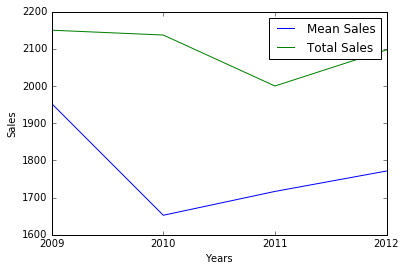

In [44]:
# Total and Mean Sales deviation across the years
year_range=sorted(final_data.Order_Year.unique())
print year_range
mean_val=final_data.groupby(['Order_Year']).mean().reset_index()
mean_sales=mean_val['Sales'].tolist()
# print mean_val
plt.plot(year_range, mean_sales,label='Mean Sales')
# ax = plt.gca()
# ax.get_xaxis().get_major_formatter().set_useOffset(False)
# plt.xticks(year_range)
plt.xlabel('Years')
plt.ylabel('Mean Sales')

mean_val=final_data.groupby(['Order_Year']).count().reset_index()
mean_sales=mean_val['Sales'].tolist()
# print mean_val
plt.plot(year_range, mean_sales,label='Total Sales')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(year_range)
plt.xlabel('Years')
plt.ylabel('Sales')
plt.legend()
plt.show()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


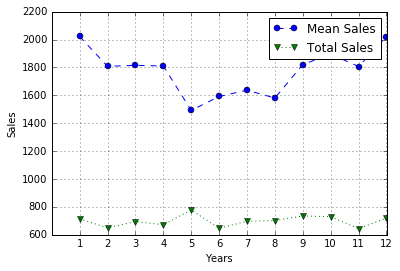

In [15]:
### Data Visualization
# Total and Mean Sales deviation across MONTHS
year_range=sorted(final_data.Order_Month.unique())
print year_range
mean_val=final_data.groupby(['Order_Month']).mean().reset_index()
mean_sales=mean_val['Sales'].tolist()
# print mean_val
plt.plot(year_range, mean_sales,'o--',label='Mean Sales')
# ax = plt.gca()
# ax.get_xaxis().get_major_formatter().set_useOffset(False)
# plt.xticks(year_range)
plt.xlabel('Years')
plt.ylabel('Mean Sales')

mean_val=final_data.groupby(['Order_Month']).count().reset_index()
mean_sales=mean_val['Sales'].tolist()
# print mean_val
plt.plot(year_range, mean_sales,'v:',label='Total Sales')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(year_range)
plt.xlabel('Years')
plt.ylabel('Sales')
ax.grid()
plt.legend()
plt.show()

['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskachewan', 'Yukon']


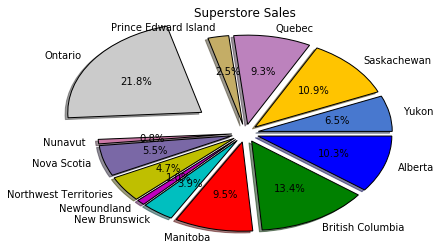

In [16]:
### Data Visualization
# Province wise Sales
provinces=sorted(final_data.Province.unique())
print provinces
province_sales=final_data.groupby(['Province']).count().reset_index()
province_sales_list=province_sales['Sales'].tolist()
colors = ['b', 'g', 'r', 'c', 'm', 'y','#7A68A6','#CC79A7','#cbcbcb','#C4AD66','#bc82bd','#FFC400','#4878CF']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.4, 0.1, 0.1, 0.1, 0.1)

# autopct the %.1f is Python formating and %% used to show as percent
plt.pie(province_sales_list, colors=colors, labels=provinces, autopct='%.1f%%',explode=explode, counterclock=False, shadow=True)
plt.title('Superstore Sales')

plt.show()

## Training a Linear Regression model using OLS regression (pandas/statsmodels)

In [17]:
from pandas.stats.api import ols
result =  ols(y=final_data['Sales'], x=final_data[['Profit','Discount','Unit Price','Order Quantity','Shipping Cost','Product Base Margin','Order_Month','Order_Year']])
result
# import statsmodels.formula.api as sm
# result = sm.ols(formula="(Sales) ~ (Profit) + (Discount)+(Order_Month)+(Order_Year)", data=final_data).fit()
# print result.summary()


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Profit> + <Discount> + <Unit Price> + <Order Quantity>
             + <Shipping Cost> + <Product Base Margin> + <Order_Month> + <Order_Year>
             + <intercept>

Number of Observations:         8384
Number of Degrees of Freedom:   9

R-squared:         0.8374
Adj R-squared:     0.8372

Rmse:           1446.4235

F-stat (8, 8375):  5389.5966, p-value:     0.0000

Degrees of Freedom: model 8, resid 8375

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Profit     1.7030     0.0136     125.57     0.0000     1.6765     1.7296
      Discount   367.2282   496.6673       0.74     0.4597  -606.2397  1340.6961
    Unit Price     6.8085     0.0564     120.62     0.0000     6.6979     6.9192
Orde

## Predictive modellling using sci-kit learn

### Finding correlation between Sales and other features

              Features  Estimated_coefficients
0               Profit                1.703040
1             Discount              367.228208
2           Unit Price                6.808536
3       Order Quantity               42.185610
4        Shipping Cost               60.675817
5  Product Base Margin             1819.968068
6          Order_Month               -0.149001
7           Order_Year               -3.574568


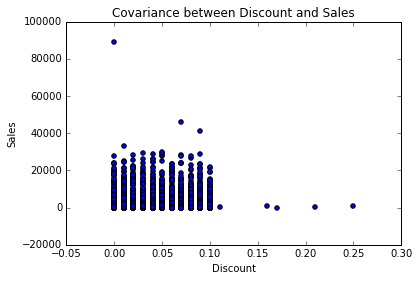

In [18]:

import sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X=final_data[['Profit','Discount','Unit Price','Order Quantity','Shipping Cost','Product Base Margin','Order_Month','Order_Year']]
# print X
lr.fit(X, final_data.Sales)
print pd.DataFrame(zip(X.columns,lr.coef_),columns=['Features','Estimated_coefficients'])
plt.scatter(final_data.Discount,final_data.Sales)
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Covariance between Discount and Sales')
plt.show()

### Predicting Future Sales

[ 1806.81673964  7522.77032119   222.89274293  4023.23002985   360.01792157]


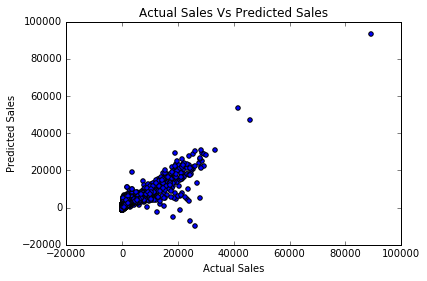

In [19]:
print lr.predict(X)[0:5]
plt.scatter(final_data.Sales,lr.predict(X))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales Vs Predicted Sales')
plt.show()

### Calculating RMSE

In [20]:
import numpy as np
MSE=np.mean((final_data.Sales-lr.predict(X))**2)
print MSE

2089895.0859
